In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
liga = pd.read_csv('/content/drive/MyDrive/laliga_player_stats_english.csv')
liga.head()

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,Percentage of games started,Games where substituted,Percentage of games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Last man,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties given away,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,Goals scored.1,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Penalties scored.1,Goals scored with header,Goals from set piece,Crosses,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,82.00%,0,0.00%,1,0,0,0,0,0,32,0,0,228,27,0,0,0,3,3,18,1,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,18.00%,0,0.00%,2,0,0,0,0,0,13,0,1,54,3,0,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,29.00%,1,3.00%,4,0,0,0,0,0,15,12,28,50,57,11,4,0,19,19,43,26,0,2,16,0,0,1,7,9,3,0,2,0,0,0,0,0,0,0,0,0,1,0,15,107,38,69,536.0,457.0,78,1,0


In [ ]:
liga.isnull().sum()
liga.dropna()

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,Percentage of games started,Games where substituted,Percentage of games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Last man,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties given away,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,Goals scored.1,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Penalties scored.1,Goals scored with header,Goals from set piece,Crosses,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,82.00%,0,0.00%,1,0,0,0,0,0,32,0,0,228,27,0,0,0,3,3,18,1,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,25,6,19,887.00,128.000,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,18.00%,0,0.00%,2,0,0,0,0,0,13,0,1,54,3,0,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,155.00,49.000,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,29.00%,1,3.00%,4,0,0,0,0,0,15,12,28,50,57,11,4,0,19,19,43,26,0,2,16,0,0,1,7,9,3,0,2,0,0,0,0,0,0,0,0,0,1,0,15,107,38,69,536.00,457.000,78,1,0
5,Athletic Club,Defender,4.0,I. Martínez,2.903,33,87.00%,32,84.00%,33,87.00%,1,3.00%,12,0,0,0,0,0,40,14,68,182,143,26,27,0,108,54,94,73,0,55,38,2,3,1,21,21,4,0,4,1,0,0,0,0,0,0,0,0,15,0,53,329,162,167,1.44,1.074,361,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Villarreal CF,Midfielder,37.0,Iván Martín,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,0,0,0
552,Villarreal CF,Midfielder,42.0,Andrei Ratiu,0.000,0,0.00%,0,0.00%,0,0.00%,0,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,0,0,0
553,Villarreal CF,Forward,7.0,Gerard,2.317,35,92.00%,16,42.00%,25,66.00%,19,50.00%,3,0,0,8,0,0,32,9,9,89,38,12,11,0,88,131,63,62,21,37,39,0,0,2,7,54,33,1,32,32,7,1,5,1,0,2,0,0,19,0,23,344,219,125,740.00,676.000,59,5,6
554,Villarreal CF,Forward,9.0,Bacca,1.259,33,87.00%,2,5.00%,12,32.00%,31,82.00%,3,0,0,6,1,0,17,0,8,30,5,2,2,0,24,56,22,25,15,9,19,1,0,1,4,22,15,1,12,7,6,0,0,4,1,2,1,0,6,1,4,127,80,47,270.00,252.000,16,2,5


In [ ]:
liga['Position'] = liga['Position'].map({'Goalkeeper':0, 'Defender':1, 'Midfielder':2, 'Forward':3})
feature = liga[['Interceptions', 'Shots']]
target = liga['Position']
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=42)

Text(0.5, 1.0, 'accuracy vs k')

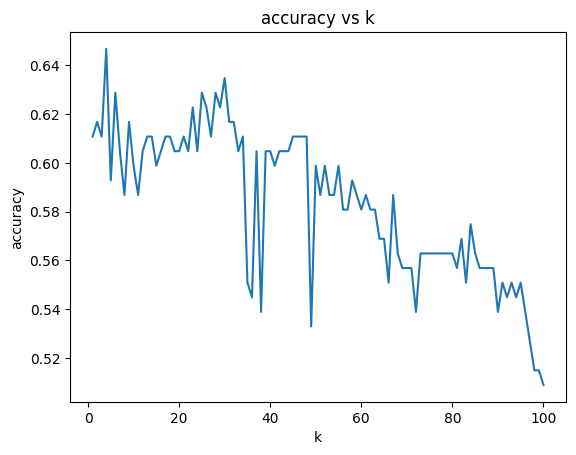

In [ ]:
k_list = range(1, 101)
accuracies = []
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(feature_train, target_train)
  accuracies.append(knn.score(feature_test, target_test))

plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('accuracy vs k')

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=2).fit(feature_train, target_train)
print('K=2: ', knn1.score(feature_test, target_test))
knn2 = KNeighborsClassifier(n_neighbors=3).fit(feature_train, target_train)
print('K=3: ', knn2.score(feature_test, target_test))
knn3 = KNeighborsClassifier(n_neighbors=4).fit(feature_train, target_train)
print('K=4: ', knn3.score(feature_test, target_test))
knn4 = KNeighborsClassifier(n_neighbors=5).fit(feature_train, target_train)
print('K=5: ', knn4.score(feature_test, target_test))

K=2:  0.6167664670658682
K=3:  0.6107784431137725
K=4:  0.6467065868263473
K=5:  0.592814371257485


In [ ]:
sample = np.array([[51, 31], [37, 25], [3, 69], [1, 0]])
print(knn3.predict(sample))

[2 2 3 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
data = pd.read_csv('/content/drive/MyDrive/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data['Species'] = data['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
feature = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
target = data['Species']
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=42)

In [ ]:
reg = KNeighborsRegressor(n_neighbors=3, weights='distance')
reg.fit(feature_train, target_train)
print(reg.score(feature_train, target_train))
print(reg.score(feature_test, target_test))

1.0
0.9928888512068458


In [ ]:
reg = KNeighborsRegressor(n_neighbors=3, weights='uniform')
reg.fit(feature_train, target_train)
print(reg.score(feature_train, target_train))
print(reg.score(feature_test, target_test))

0.9540165165165165
0.9893162393162394


In [ ]:
sample = feature.sample(100)
sample

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
146,6.3,2.5,5.0,1.9
0,5.1,3.5,1.4,0.2
140,6.7,3.1,5.6,2.4
66,5.6,3.0,4.5,1.5
26,5.0,3.4,1.6,0.4
...,...,...,...,...
72,6.3,2.5,4.9,1.5
86,6.7,3.1,4.7,1.5
33,5.5,4.2,1.4,0.2
35,5.0,3.2,1.2,0.2


In [ ]:
pred = reg.predict(sample)
pred

array([2.        , 0.        , 2.        , 1.        , 0.        ,
       1.66666667, 0.        , 2.        , 2.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.66666667, 1.        , 0.        , 2.        , 2.        ,
       1.        , 1.        , 0.        , 2.        , 2.        ,
       2.        , 1.        , 0.        , 1.        , 1.        ,
       2.        , 2.        , 2.        , 0.        , 2.        ,
       0.        , 1.66666667, 0.        , 1.        , 1.        ,
       0.        , 2.        , 2.        , 0.        , 0.        ,
       0.        , 2.        , 1.33333333, 1.        , 1.        ,
       0.        , 1.66666667, 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 2.        ,
       2.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.33333333,
       2.        , 1.        , 1.        , 2.        , 1.     